# Kaggle Project: [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)




- Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

- Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

- Submission File Format

The file should contain a header and have the following format:

Id,SalePrice   
1461,169000.1    
1462,187724.1233    
1463,175221   
etc.   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
df_train=pd.read_csv('data/train.csv')
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [54]:
df_train['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [4]:
df_train.shape

(1460, 81)

In [5]:
# Generates descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_test=pd.read_csv('data/test.csv')
df_test.set_index('Id',inplace=True)
df_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [7]:
df_test.shape

(1459, 79)

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Familar with the data

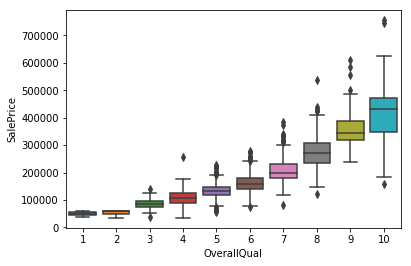

In [9]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df_train)

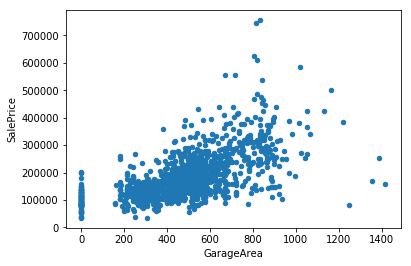

In [10]:
df_train.plot(kind='scatter',x='GarageArea',y="SalePrice")

# Heapmap showing the correlation matrix

**df_train.corr()**: Compute pairwise correlation of columns, excluding NA/null values

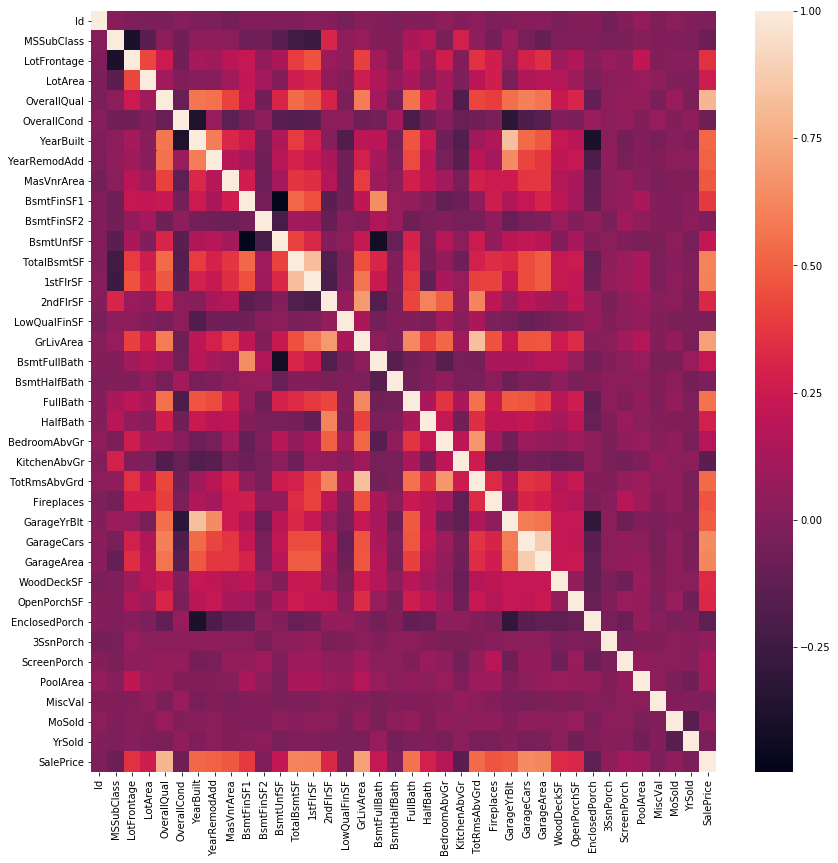

In [11]:
plt.figure(figsize=(14,14))
corr=df_train.corr()
sns.heatmap(corr)

# Extract the  features relevant  to the SalePrice

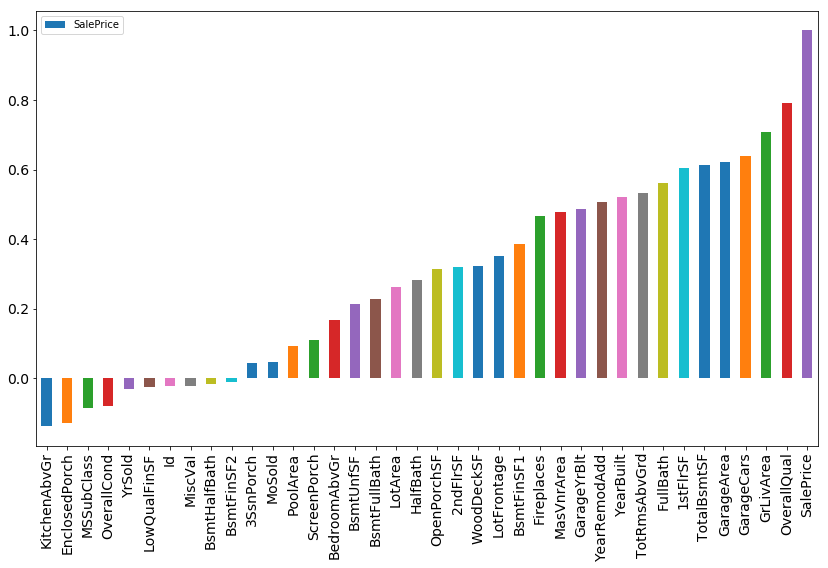

In [12]:
df_corr_SalePrice=df_train.corr().tail(1).T
df_corr_SalePrice.sort_values(by='SalePrice',inplace=True)
df_corr_SalePrice.plot(kind='bar',y='SalePrice',figsize=(14,8),fontsize=14)

In [13]:
features_all_corr04=list(df_corr_SalePrice[df_corr_SalePrice['SalePrice']>0.4].T.columns)
features_all_corr04

['Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [14]:
features_corr04=features_all_corr04[0:len(features_all_corr04)-1]
features_corr04

['Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [15]:
features_all_corr05=list(df_corr_SalePrice[df_corr_SalePrice['SalePrice']>0.5].T.columns)
features_all_corr05

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [16]:
features_corr05=features_all_corr05[0:len(features_all_corr05)-1]
features_corr05

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

# Data cleaning and replacing missing data 

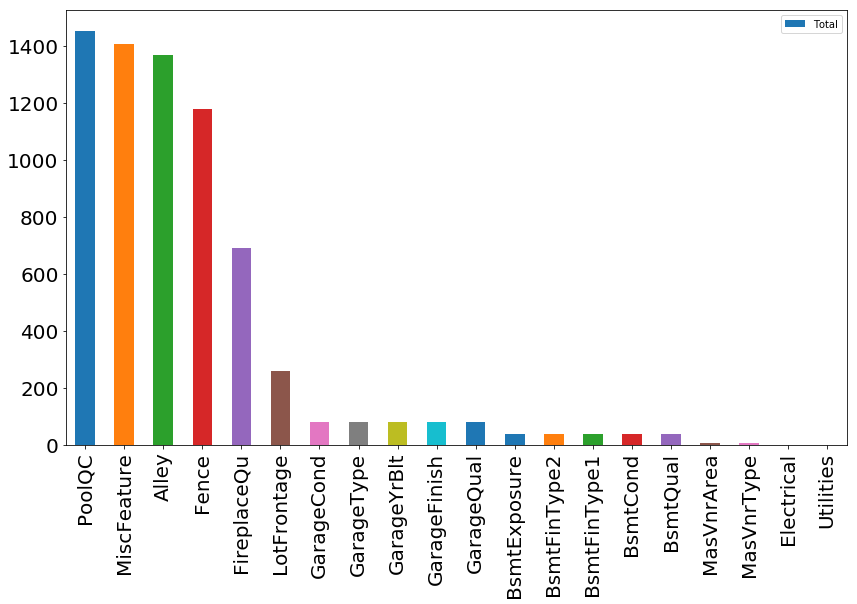

In [17]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data20=missing_data.head(20)
missing_data20.plot(kind='bar',y='Total',figsize=(14,8),fontsize=20)

In [18]:
df_train_drop100=df_train.drop((missing_data[missing_data['Total'] > 100]).index,1)
df_train_drop100.shape 

(1460, 75)

# Prepare training data with features and target

- using the data with the features "features_all_corr05", there is no NAN.
- using the data with the features "features_all_corr04", there is 81 NAN.

In [19]:
df_train_features=df_train_drop100[features_all_corr05]
df_train_features.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


In [20]:
df_train_features.isnull().sum().max()

0

# Prepare Test Data

In [21]:
df_test_features=df_test[features_corr05]
df_test_features.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
Id,,,,,,,,,,
1461,1961,1961,5,1,896,882.0,730.0,1.0,896,5
1462,1958,1958,6,1,1329,1329.0,312.0,1.0,1329,6
1463,1998,1997,6,2,928,928.0,482.0,2.0,1629,5
1464,1998,1998,7,2,926,926.0,470.0,2.0,1604,6
1465,1992,1992,5,2,1280,1280.0,506.0,2.0,1280,8


In [22]:
df_test_features.isnull().sum().max()

1

In [23]:
test_mising_total = df_test_features.isnull().sum().sort_values(ascending=False) 
test_missing_data = pd.concat([test_mising_total], axis=1, keys=['Total Missing'])
test_missing_data.head(20) 


,Total Missing
GarageCars,1
GarageArea,1
TotalBsmtSF,1
OverallQual,0
GrLivArea,0
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0
YearRemodAdd,0


In [24]:
replace_features=list(test_missing_data[test_missing_data['Total Missing']>0].T.columns)
replace_features

['GarageCars', 'GarageArea', 'TotalBsmtSF']

In [25]:
for rep in replace_features:
    median=df_test_features[rep].median()
    df_test_features[rep]=df_test_features[rep].replace(np.nan,median)
df_test_features.isnull().sum().max()

0

# standardization for the target (NOT adapted)

converting **SalePrice** values to have mean of 0 and a standard deviation of 1.

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

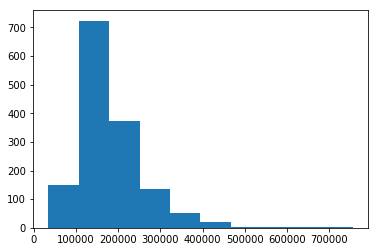

In [26]:

#y_train_std= StandardScaler().fit_transform(df_train_features['SalePrice'][:,np.newaxis]);
y_train_std = df_train_features['SalePrice']
plt.hist(y_train_std)

In [27]:
X_train_features=df_train_features.drop(['SalePrice'],axis=1)
X_train_features.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,2003,2003,8,2,856,856,548,2,1710,7
1,1976,1976,6,2,1262,1262,460,2,1262,6
2,2002,2001,6,2,920,920,608,2,1786,7
3,1970,1915,7,1,961,756,642,3,1717,7
4,2000,2000,9,2,1145,1145,836,3,2198,8


#  Ridge Linear Regression

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_train_features,y_train_std,test_size=0.33)

In [29]:
for alpha in np.arange(0,1.0,0.2):
    clf = Ridge(alpha=alpha).fit(X_train,y_train)
    print("alpha={:.2f}, Train set score {:.2f}".format(alpha,clf.score(X_train,y_train)))
    print("alpha={:.2f}, Test set score {:.2f}".format(alpha,clf.score(X_test,y_test))) 

alpha=0.00, Train set score 0.75
alpha=0.00, Test set score 0.81
alpha=0.20, Train set score 0.75
alpha=0.20, Test set score 0.81
alpha=0.40, Train set score 0.75
alpha=0.40, Test set score 0.81
alpha=0.60, Train set score 0.75
alpha=0.60, Test set score 0.81
alpha=0.80, Train set score 0.75
alpha=0.80, Test set score 0.81


# Lasso Linear Regression

In [30]:
for alpha in np.arange(0,1.0,0.2):
    clf = Lasso(alpha=alpha).fit(X_train,y_train)
    print("alpha={:.2f}, Train set score {:.2f}".format(alpha,clf.score(X_train,y_train)))
    print("alpha={:.2f}, Test set score {:.2f}".format(alpha,clf.score(X_test,y_test))) 

alpha=0.00, Train set score 0.75
alpha=0.00, Test set score 0.81
alpha=0.20, Train set score 0.75
alpha=0.20, Test set score 0.81
alpha=0.40, Train set score 0.75
alpha=0.40, Test set score 0.81
alpha=0.60, Train set score 0.75
alpha=0.60, Test set score 0.81
alpha=0.80, Train set score 0.75
alpha=0.80, Test set score 0.81


# Polynomial Linear Regression

In [33]:
score_best =0
degree_best=0
alpha_best =0
score_train =0
for alpha in np.arange(0,1.0,0.2):
    for degree in range(1,6):
        Poly=PolynomialFeatures(degree=degree)
        X_train_transform=Poly.fit_transform(X_train)
        X_test_transform=Poly.fit_transform(X_test) 
        clf=linear_model.Lasso(alpha=alpha)
        clf.fit(X_train_transform,y_train)
        y_train_pred=clf.predict(X_train_transform)
        y_test_pred=clf.predict(X_test_transform)
        
        if(r2_score(y_test_pred,y_test) > score_best):
            score_best  = r2_score(y_test_pred,y_test)
            degree_best = degree
            alpha_best  = alpha
            score_train = r2_score(y_train_pred,y_train)
        print('alpha={:.2f},degree={:d}, train data: r2_score={:.2f}'.format(alpha,degree,r2_score(y_train_pred,y_train)))
        print('alpha={:.2f},degree={:d}, test data: r2_score={:.2f}'.format(alpha,degree,r2_score(y_test_pred,y_test)))

print("The best case: alpha={:.2f},degree={:d}, test_score={:.2f}, train_score={:.2f}"
      .format(alpha_best,degree_best,score_best,score_train))
 

alpha=0.00,degree=1, train data: r2_score=0.67
alpha=0.00,degree=1, test data: r2_score=0.74
alpha=0.00,degree=2, train data: r2_score=0.83
alpha=0.00,degree=2, test data: r2_score=0.85
alpha=0.00,degree=3, train data: r2_score=0.87
alpha=0.00,degree=3, test data: r2_score=0.84
alpha=0.00,degree=4, train data: r2_score=0.89
alpha=0.00,degree=4, test data: r2_score=0.84
alpha=0.00,degree=5, train data: r2_score=0.90
alpha=0.00,degree=5, test data: r2_score=0.82
alpha=0.20,degree=1, train data: r2_score=0.67
alpha=0.20,degree=1, test data: r2_score=0.74
alpha=0.20,degree=2, train data: r2_score=0.83
alpha=0.20,degree=2, test data: r2_score=0.85
alpha=0.20,degree=3, train data: r2_score=0.87
alpha=0.20,degree=3, test data: r2_score=0.84
alpha=0.20,degree=4, train data: r2_score=0.89
alpha=0.20,degree=4, test data: r2_score=0.84
alpha=0.20,degree=5, train data: r2_score=0.90
alpha=0.20,degree=5, test data: r2_score=0.82
alpha=0.40,degree=1, train data: r2_score=0.67
alpha=0.40,degree=1, te

In [34]:
df_train_features.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


In [35]:
features_all_corr05

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [36]:
features=features_all_corr05[0:len(features_all_corr05)-1]
features

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [37]:
#degree=2
#alpha=0.1
 
score_best =0
score_train=0
degree_best=0
alpha_best =0
for alpha in np.arange(0,1.0,0.2):
    for degree in range(1,5):
        for epoch in range(1,5):
            Poly=PolynomialFeatures(degree=degree)
            df_sample=df_train_features[features_all_corr05].sample(frac=1).reset_index(drop=True)

            X_train,X_test,y_train,y_test=train_test_split(df_sample[features],df_sample['SalePrice'],test_size=0.33)
            X_train_transform =Poly.fit_transform(X_train)
            X_test_transform  =Poly.fit_transform(X_test) 

            clf=linear_model.Lasso(alpha=alpha)
            clf.fit(X_train_transform,y_train)
            y_train_pred=clf.predict(X_train_transform)
            y_test_pred=clf.predict(X_test_transform) 
            print('epoch={:d},alpha={:.2f},degree={:d}, train data: r2_score={:.2f}'
                  .format(epoch,alpha,degree,r2_score(y_train_pred,y_train)))
            print('epoch={:d},alpha={:.2f},degree={:d}, test data: r2_score={:.2f}'
                  .format(epoch,alpha,degree,r2_score(y_test_pred,y_test)))
            if(r2_score(y_test_pred,y_test) > score_best):
                score_best  = r2_score(y_test_pred,y_test)
                degree_best = degree
                alpha_best  = alpha
                score_train = r2_score(y_train_pred,y_train)
print("The best case: epoch={:d},alpha={:.2f},degree={:d}, test_score={:.2f}, train_score={:.2f}"
      .format(epoch,alpha_best,degree_best,score_best,score_train))


epoch=1,alpha=0.00,degree=1, train data: r2_score=0.68
epoch=1,alpha=0.00,degree=1, test data: r2_score=0.72
epoch=2,alpha=0.00,degree=1, train data: r2_score=0.73
epoch=2,alpha=0.00,degree=1, test data: r2_score=0.73
epoch=3,alpha=0.00,degree=1, train data: r2_score=0.74
epoch=3,alpha=0.00,degree=1, test data: r2_score=0.68
epoch=4,alpha=0.00,degree=1, train data: r2_score=0.74
epoch=4,alpha=0.00,degree=1, test data: r2_score=0.66
epoch=1,alpha=0.00,degree=2, train data: r2_score=0.84
epoch=1,alpha=0.00,degree=2, test data: r2_score=0.77
epoch=2,alpha=0.00,degree=2, train data: r2_score=0.89
epoch=2,alpha=0.00,degree=2, test data: r2_score=0.72
epoch=3,alpha=0.00,degree=2, train data: r2_score=0.84
epoch=3,alpha=0.00,degree=2, test data: r2_score=0.83
epoch=4,alpha=0.00,degree=2, train data: r2_score=0.83
epoch=4,alpha=0.00,degree=2, test data: r2_score=0.78
epoch=1,alpha=0.00,degree=3, train data: r2_score=0.88
epoch=1,alpha=0.00,degree=3, test data: r2_score=0.78
epoch=2,alpha=0.00,

epoch=1,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=1,alpha=0.80,degree=4, test data: r2_score=0.69
epoch=2,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=2,alpha=0.80,degree=4, test data: r2_score=0.80
epoch=3,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=3,alpha=0.80,degree=4, test data: r2_score=0.76
epoch=4,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=4,alpha=0.80,degree=4, test data: r2_score=0.77
The best case: epoch=4,alpha=0.40,degree=2, test_score=0.87, train_score=0.82


In [38]:
clf.coef_.shape

(1001,)

# Test the test data

In [39]:
df_test_features.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
Id,,,,,,,,,,
1461,1961,1961,5,1,896,882.0,730.0,1.0,896,5
1462,1958,1958,6,1,1329,1329.0,312.0,1.0,1329,6
1463,1998,1997,6,2,928,928.0,482.0,2.0,1629,5
1464,1998,1998,7,2,926,926.0,470.0,2.0,1604,6
1465,1992,1992,5,2,1280,1280.0,506.0,2.0,1280,8


In [42]:
Save2File=pd.DataFrame()
df_temp=df_test_features.copy()
df_temp.reset_index(inplace=True)
#Save2File['ID']=df_temp['ID']
df_temp.head()


,Id,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,1461,1961,1961,5,1,896,882.0,730.0,1.0,896,5
1,1462,1958,1958,6,1,1329,1329.0,312.0,1.0,1329,6
2,1463,1998,1997,6,2,928,928.0,482.0,2.0,1629,5
3,1464,1998,1998,7,2,926,926.0,470.0,2.0,1604,6
4,1465,1992,1992,5,2,1280,1280.0,506.0,2.0,1280,8


In [43]:

score_best =0
score_train=0
degree_best=0
alpha_best =0 

Save2File['Id']=df_temp['Id']
for alpha in np.arange(0,1.0,0.2):
    for degree in range(1,5):
        for epoch in range(1,5):
            Poly=PolynomialFeatures(degree=degree)
            df_sample=df_train_features[features_all_corr05].sample(frac=1).reset_index(drop=True)

            X_train,X_test,y_train,y_test=train_test_split(df_sample[features],df_sample['SalePrice'],test_size=0.33)
            X_train_transform =Poly.fit_transform(X_train)
            X_test_transform  =Poly.fit_transform(X_test)
            
            X_test_final  = Poly.fit_transform(df_test_features) # real testdata

            clf=linear_model.Lasso(alpha=alpha)
            clf.fit(X_train_transform,y_train)
            y_train_pred=clf.predict(X_train_transform)
            y_test_pred=clf.predict(X_test_transform) 
            print('epoch={:d},alpha={:.2f},degree={:d}, train data: r2_score={:.2f}'
                  .format(epoch,alpha,degree,r2_score(y_train_pred,y_train)))
            print('epoch={:d},alpha={:.2f},degree={:d}, test data: r2_score={:.2f}'
                  .format(epoch,alpha,degree,r2_score(y_test_pred,y_test)))
            if(r2_score(y_test_pred,y_test) > score_best):
                score_best  = r2_score(y_test_pred,y_test)
                degree_best = degree
                alpha_best  = alpha
                score_train = r2_score(y_train_pred,y_train)
                
                y_test_final = clf.predict(X_test_final) # prediction for real test data
                Save2File['SalePrice']=y_test_final
                
                
print("The best case: epoch={:d},alpha={:.2f},degree={:d}, test_score={:.2f}, train_score={:.2f}"
      .format(epoch,alpha_best,degree_best,score_best,score_train))



epoch=1,alpha=0.00,degree=1, train data: r2_score=0.75
epoch=1,alpha=0.00,degree=1, test data: r2_score=0.65
epoch=2,alpha=0.00,degree=1, train data: r2_score=0.68
epoch=2,alpha=0.00,degree=1, test data: r2_score=0.75
epoch=3,alpha=0.00,degree=1, train data: r2_score=0.66
epoch=3,alpha=0.00,degree=1, test data: r2_score=0.71
epoch=4,alpha=0.00,degree=1, train data: r2_score=0.76
epoch=4,alpha=0.00,degree=1, test data: r2_score=0.66
epoch=1,alpha=0.00,degree=2, train data: r2_score=0.84
epoch=1,alpha=0.00,degree=2, test data: r2_score=0.84
epoch=2,alpha=0.00,degree=2, train data: r2_score=0.84
epoch=2,alpha=0.00,degree=2, test data: r2_score=0.85
epoch=3,alpha=0.00,degree=2, train data: r2_score=0.85
epoch=3,alpha=0.00,degree=2, test data: r2_score=0.73
epoch=4,alpha=0.00,degree=2, train data: r2_score=0.84
epoch=4,alpha=0.00,degree=2, test data: r2_score=0.72
epoch=1,alpha=0.00,degree=3, train data: r2_score=0.88
epoch=1,alpha=0.00,degree=3, test data: r2_score=0.07
epoch=2,alpha=0.00,

epoch=1,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=1,alpha=0.80,degree=4, test data: r2_score=0.03
epoch=2,alpha=0.80,degree=4, train data: r2_score=0.91
epoch=2,alpha=0.80,degree=4, test data: r2_score=0.17
epoch=3,alpha=0.80,degree=4, train data: r2_score=0.91
epoch=3,alpha=0.80,degree=4, test data: r2_score=0.27
epoch=4,alpha=0.80,degree=4, train data: r2_score=0.90
epoch=4,alpha=0.80,degree=4, test data: r2_score=0.77
The best case: epoch=4,alpha=0.20,degree=4, test_score=0.86, train_score=0.89


In [44]:
Save2File.head()

,Id,SalePrice
0,1461,134783.960410
1,1462,153431.772357
2,1463,176661.264036
3,1464,182583.813017
4,1465,197915.908528


In [45]:
Save2File.describe()

,Id,SalePrice
count,1459.000000,1.459000e+03
mean,2190.000000,1.756778e+05
std,421.321334,1.007860e+05
min,1461.000000,-2.371316e+06
25%,1825.500000,1.277740e+05
50%,2190.000000,1.575968e+05
75%,2554.500000,2.096819e+05
max,2919.000000,6.129425e+05


In [46]:
Save2File.rename(columns={'ID':'Id'},inplace=True)
Save2File.set_index('Id',inplace=True) 
Save2File.to_csv('Polynomial_House_Price.csv')
Save2File.describe()

,SalePrice
count,1.459000e+03
mean,1.756778e+05
std,1.007860e+05
min,-2.371316e+06
25%,1.277740e+05
50%,1.575968e+05
75%,2.096819e+05
max,6.129425e+05


In [47]:
Save2File.head()

,SalePrice
Id,
1461,134783.960410
1462,153431.772357
1463,176661.264036
1464,182583.813017
1465,197915.908528


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 1.363e+03, 9.200e+01]),
 array([-2371316.02597738, -2072890.17778291, -1774464.32958844,
        -1476038.48139397, -1177612.6331995 ,  -879186.78500503,
         -580760.93681056,  -282335.08861609,    16090.75957839,
          314516.60777286,   612942.45596733]),
 <a list of 10 Patch objects>)

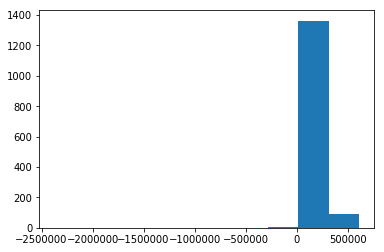

In [48]:
plt.hist(Save2File['SalePrice'])

In [49]:
cat_attributes=[key for key in dict(df_train.dtypes=['object'])]

TypeError: 'type' object is not subscriptable

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}